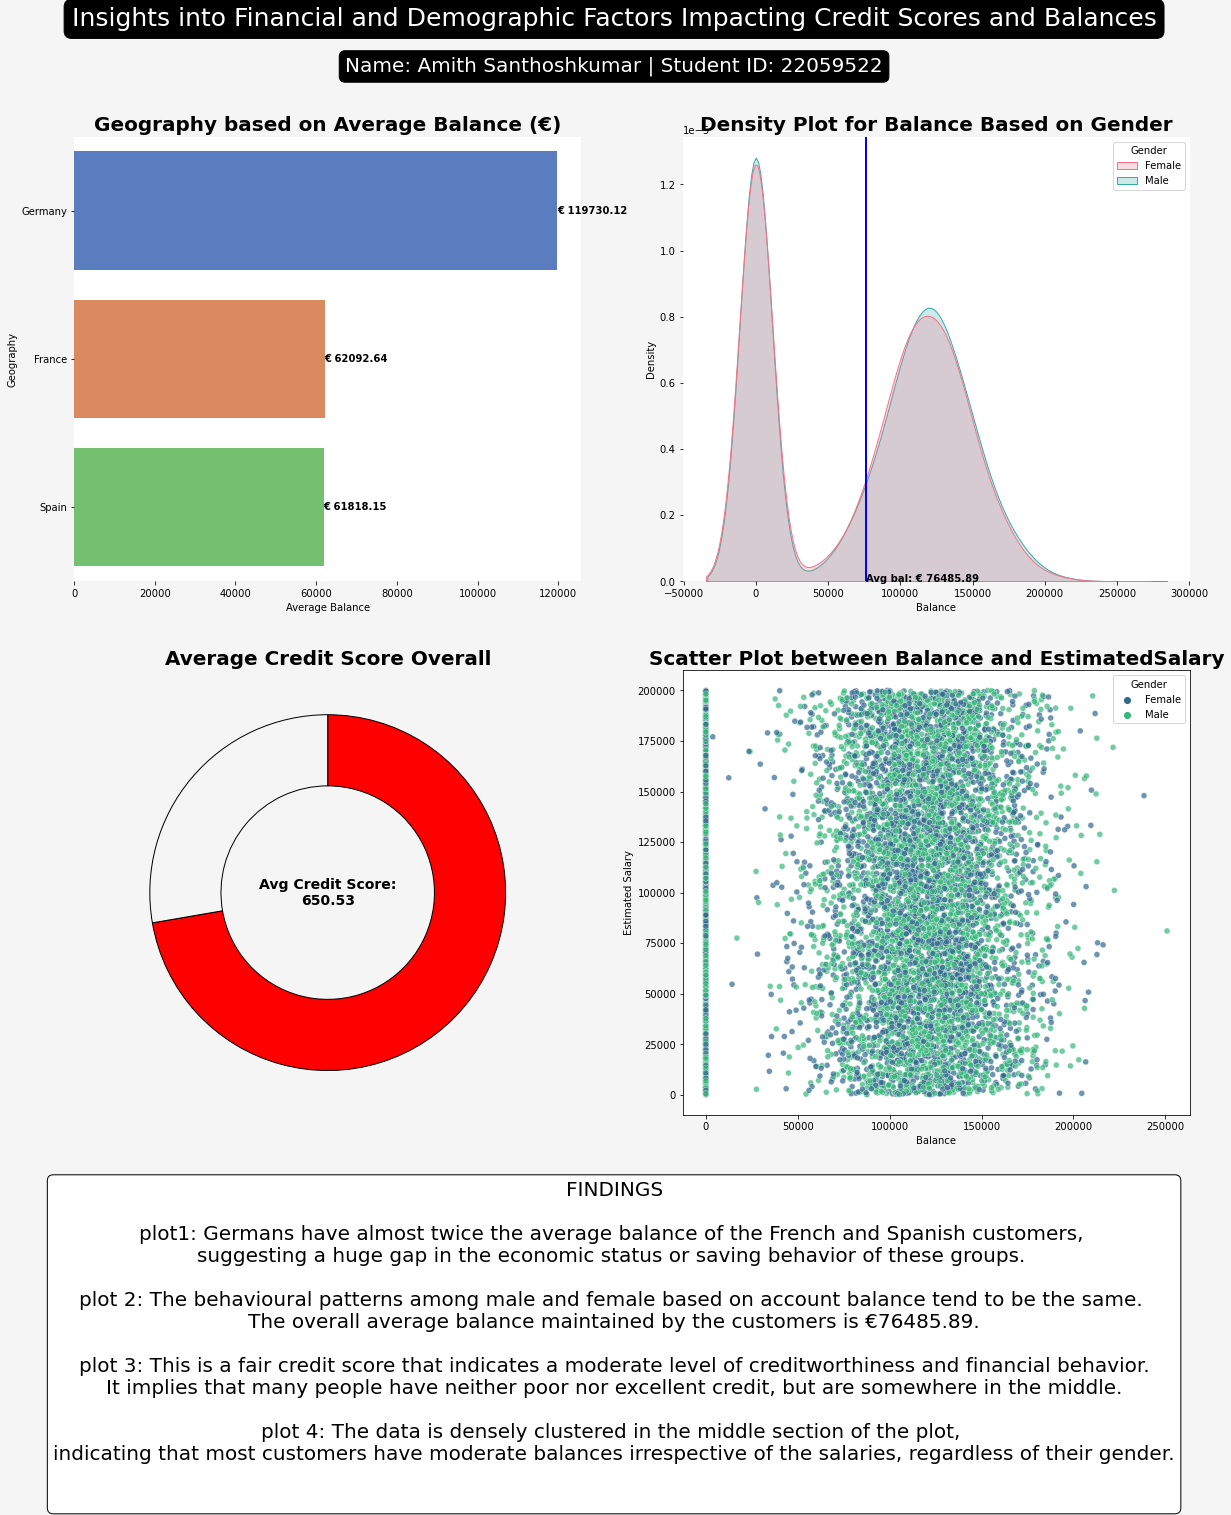

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

df = pd.read_csv('Customer-Churn-Records.csv')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18), facecolor='#F5F5F5')
plt.suptitle("Insights into Financial and Demographic Factors Impacting Credit Scores and Balances", fontsize=25, color='white', bbox=dict(boxstyle='round', facecolor='black', edgecolor='black', linewidth=1))
fig.text(0.5, 0.93, 'Name: Amith Santhoshkumar | Student ID: 22059522', ha='center', fontsize=20, color='white', bbox=dict(boxstyle='round', facecolor='black', edgecolor='black', linewidth=1))

average_balance_geo = df.groupby('Geography')['Balance'].mean().sort_values(ascending=False)

sns.barplot(x=average_balance_geo, y=average_balance_geo.index, palette='muted', ax=axes[0, 0])
for patch in axes[0, 0].patches:
    width = patch.get_width()
    height = patch.get_height()
    x_position = patch.get_x() + width
    y_position = patch.get_y() + height / 2
    axes[0, 0].annotate(f'€ {width:.2f}', xy=(x_position, y_position), ha='left', va='center', fontweight='bold', fontsize=10, color='black')
sns.despine(bottom=True, left=True, ax=axes[0, 0])
axes[0, 0].set_title('Geography based on Average Balance (€)', fontsize=20, fontweight='bold')
axes[0, 0].set_xlabel('Average Balance')
axes[0, 0].set_ylabel('Geography')


average_balance = df['Balance'].mean()
sns.kdeplot(data=df, x='Balance', hue='Gender', fill=True, common_norm=False, palette='husl', label='CreditScore Density', ax=axes[0, 1])
axes[0, 1].axvline(average_balance, color='blue', linewidth=2, label=f'Average Balance: {average_balance:.2f}')
axes[0, 1].text(average_balance + 5, 0, f'Avg bal: € {average_balance:.2f}', fontweight='bold', color='black', fontsize=10)
sns.despine(bottom=True, left=True, ax=axes[0, 1])
axes[0, 1].set_title('Density Plot for Balance Based on Gender', fontsize=20, fontweight='bold')
axes[0, 1].set_xlabel('Balance')
axes[0, 1].set_ylabel('Density')

total_possible_credit = 900
average_credit_overall = df['CreditScore'].mean()
percentage_credit_overall = average_credit_overall / total_possible_credit * 100
axes[1, 0].pie([percentage_credit_overall, 100 - percentage_credit_overall], colors=['red', '#F5F5F5'], startangle=90, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='black'))
centre_circle_overall = plt.Circle((0, 0), 0.3, color='#F5F5F5', linewidth=0.8)
axes[1, 0].add_patch(centre_circle_overall)
axes[1, 0].set_title('Average Credit Score Overall', fontsize=20, fontweight='bold')
axes[1, 0].text(0, 0, f'Avg Credit Score:\n{average_credit_overall:.2f}', ha='center', va='center', fontsize=14, fontweight='bold', color='black')

sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', hue='Gender', palette='viridis', alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot between Balance and EstimatedSalary', fontsize=20, fontweight='bold')
axes[1, 1].set_xlabel('Balance')
axes[1, 1].set_ylabel('Estimated Salary')
axes[1, 1].legend(title='Gender', loc='upper right')

findings = """FINDINGS

plot1: Germans have almost twice the average balance of the French and Spanish customers, 
suggesting a huge gap in the economic status or saving behavior of these groups. \n\nplot 2: The behavioural patterns among male and female based on account balance tend to be the same. 
The overall average balance maintained by the customers is €76485.89.\n\nplot 3: This is a fair credit score that indicates a moderate level of creditworthiness and financial behavior.
It implies that many people have neither poor nor excellent credit, but are somewhere in the middle.\n\nplot 4: The data is densely clustered in the middle section of the plot, 
indicating that most customers have moderate balances irrespective of the salaries, regardless of their gender.

"""

fig.text(0.5, -0.175, findings, ha='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=1))

plt.show()